In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [4]:
# create color patterns
import colors

orange = ["#ffac00"]
darkorange = ["#c46e00"]
blue = ["#0F52BA"]
gold = ["#FFA000"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
brown = ["#98733a"]
purple = ["#4b0082"]
qt_red = ["#B22222"]
c0_blue = ["#1f77b4"]
c1_orange = ["#ff7f0e"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        gold.append(colors.get_alpha_hex(gold[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))
        brown.append(colors.get_alpha_hex(brown[0],beta[i]))
        purple.append(colors.get_alpha_hex(purple[0],beta[i]))
        qt_red.append(colors.get_alpha_hex(qt_red[0],beta[i]))
        c0_blue.append(colors.get_alpha_hex(c0_blue[0],beta[i]))
        c1_orange.append(colors.get_alpha_hex(c1_orange[0],beta[i]))

In [5]:
### size of QMC Hilbert space as a function of nqubit ###
# here we just use a single sample as the fluctuation is small
# and the figure is for qualitatively analysis
n_qubit_plus_state = [6, 8, 10, 12, 14, 16]
qmc_space_size_plus_state = [3113, 15590, 49564, 105692, 547792, 2158093]

n_qubit_w_state = [6, 8, 10, 12, 14, 16, 18, 20]
qmc_space_size_w_state = [2607, 6443, 13985, 28251, 75317, 240288, 855862, 3203804]

n_qubit_ghz = [6, 8, 10, 12, 14, 16, 18]
qmc_space_size_ghz = [876, 2292, 8523, 28171, 101490, 369000, 1450606]

In [6]:
# a simple linear fitting
def simple_linear_regression(x, y):
    """
    Perform simple linear regression and return slope, intercept and R².
    """
    x = np.array(x)
    y = np.array(y)
    
    # Calculate means
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate slope
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    
    # Calculate intercept
    intercept = y_mean - (slope * x_mean)
    
    # Calculate R²
    y_pred = slope * x + intercept
    r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - y_mean) ** 2))
    
    return slope, intercept, r_squared

slope_p, interception_p, r_squared_p = simple_linear_regression(n_qubit_plus_state[3:6], np.log10(qmc_space_size_plus_state[3:6]))
slope_w, interception_w, r_squared_w = simple_linear_regression(n_qubit_w_state[3:8], np.log10(qmc_space_size_w_state[3:8]))
slope_ghz, interception_ghz, r_squared_ghz = simple_linear_regression(n_qubit_ghz[3:7], np.log10(qmc_space_size_ghz[3:7]))

In [7]:
print(10**slope_p, 10**slope_w, 10**slope_ghz)

2.125724656483848 1.8123361280003438 1.9266030192856507


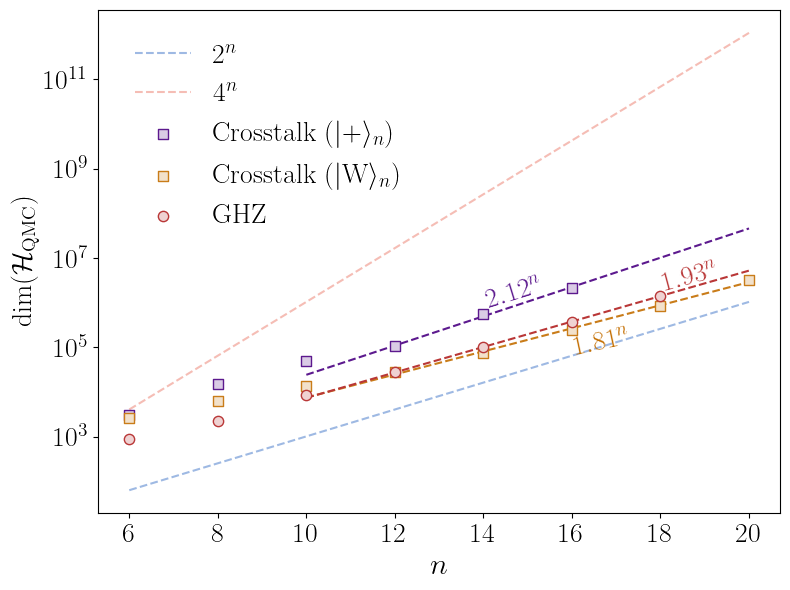

In [8]:
fig, ax_qmc_space = plt.subplots(figsize=(8, 6))

ax_qmc_space.plot(np.linspace(6,20), 2**np.linspace(6,20), 
                linestyle='dashed',
                color=blue[4], label=r'$2^{n}$')

ax_qmc_space.plot(np.linspace(6,20), 4**np.linspace(6,20), 
                linestyle='dashed',
                color=red[4], label=r'$4^{n}$')

# linear fitting
n_fitting = np.linspace(10, 20, 300)
t_fitting_p = slope_p * n_fitting + interception_p
t_fitting_w = slope_w * n_fitting + interception_w
t_fitting_ghz = slope_ghz * n_fitting + interception_ghz
ax_qmc_space.plot(n_fitting, 10**t_fitting_p, linestyle='dashed', color=purple[1], zorder=1)
ax_qmc_space.plot(n_fitting, 10**t_fitting_w, linestyle='dashed', color=darkorange[1], zorder=1)
ax_qmc_space.plot(n_fitting, 10**t_fitting_ghz, linestyle='dashed', color=qt_red[1], zorder=1)

ax_qmc_space.scatter(n_qubit_plus_state, qmc_space_size_plus_state, 
                marker='s', s=45,
                color=purple[1], facecolor=purple[5], zorder=2, label="Crosstalk "+r"$(|+\rangle_n)$")

ax_qmc_space.scatter(n_qubit_w_state, qmc_space_size_w_state, 
                marker='s', s=45,
                edgecolor=darkorange[1], facecolor=darkorange[5], zorder=2, label="Crosstalk "+ r"$(| \mathrm{W} \rangle_n)$")

ax_qmc_space.scatter(n_qubit_ghz, qmc_space_size_ghz, 
                marker='o', s=55,
                edgecolor=qt_red[1], facecolor=qt_red[5], zorder=2, label="GHZ")

ax_qmc_space.set_yscale('log')
ax_qmc_space.set_xlabel(r'$n$', fontsize=22)
ax_qmc_space.set_ylabel(r'$\dim(\mathcal{H}_{\mathrm{QMC}})$', fontsize=20)

ax_qmc_space.legend(bbox_to_anchor=(0.25, 0.75), frameon = False, fontsize=20, loc='center')
ax_qmc_space.tick_params(axis='both', which='major', labelsize=20)

ax_qmc_space.text(14, 7.6e5, r"$2.12^{n}$", rotation=17, color=purple[1], fontsize=20)
ax_qmc_space.text(18, 1.9e6, r"$1.93^{n}$", rotation=15, color=qt_red[1], fontsize=20)
ax_qmc_space.text(16, 0.7e5, r"$1.81^{n}$", rotation=12, color=darkorange[0], fontsize=20)


plt.tight_layout()
plt.savefig("../fig/supplement_qmc_hilbert_space.pdf")

In [9]:
data_truncation_benchmark_ghz_10qubit = np.load("../data/truncation_benchmark_ghz_10qubit.npz")

truncation_ratio = data_truncation_benchmark_ghz_10qubit['threshold_list']

dim_qmc_mean = data_truncation_benchmark_ghz_10qubit['dim_qmc_mean']
dim_qmc_ub   = data_truncation_benchmark_ghz_10qubit['dim_qmc_ub']
dim_qmc_lb   = data_truncation_benchmark_ghz_10qubit['dim_qmc_lb']

T_qmc_mean = data_truncation_benchmark_ghz_10qubit['T_qmc_mean']
T_qmc_ub   = data_truncation_benchmark_ghz_10qubit['T_qmc_ub']
T_qmc_lb   = data_truncation_benchmark_ghz_10qubit['T_qmc_lb']

data_truncation_benchmark_ghz_10qubit_avg = np.load("../data/truncation_benchmark_ghz_10qubit_avg.npz")
T_qmc_avg = data_truncation_benchmark_ghz_10qubit_avg['T_qmc_avg_list']

data_truncation_benchmark_ghz_12qubit = np.load("../data/truncation_benchmark_ghz_12qubit.npz")
dim_qmc_12qubit = data_truncation_benchmark_ghz_12qubit['dim_qmc_list']

/var/folders/zw/mls6dy0526nbvp33kfmr9vdw0000gn/T/ipykernel_70238/813887025.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


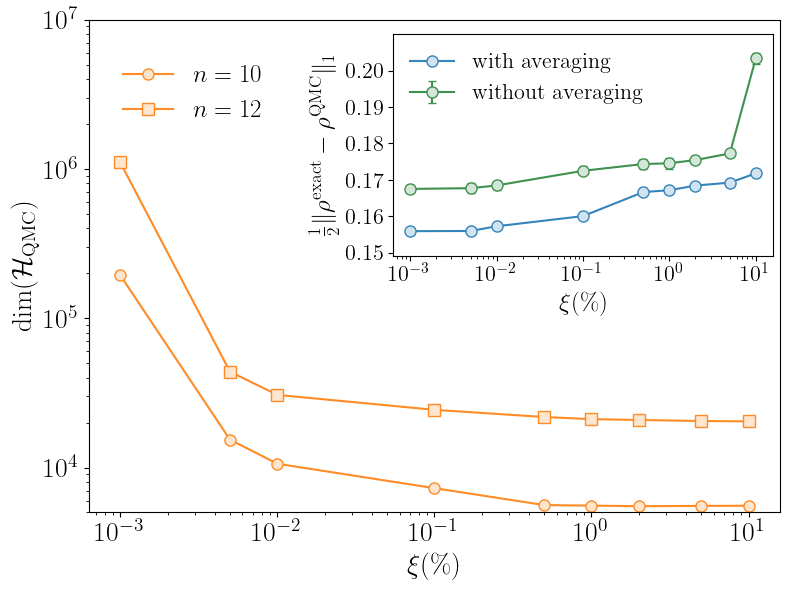

In [10]:
fig, ax_trunc = plt.subplots(1, 1, figsize=(8, 6))

ax_trunc.plot(truncation_ratio*100,  dim_qmc_mean,
            marker='o', markersize=8, label=r'$n = 10$',
            color=c1_orange[1], markerfacecolor=c1_orange[5])
ax_trunc.set_xscale('log')
ax_trunc.set_yscale('log')

ax_trunc.plot(truncation_ratio*100,  dim_qmc_12qubit,
            marker='s', markersize=8, label=r'$n = 12$',
            color=c1_orange[1], markerfacecolor=c1_orange[5])

ax_trunc.set_ylim(5000, 1e7)
ax_trunc.set_xlabel(r'$\xi (\%)$', fontsize=20)
ax_trunc.set_ylabel(r'$\dim(\mathcal{H}_{\mathrm{QMC}})$', fontsize=20)
ax_trunc.tick_params(axis='both', which='major', labelsize=20)

ax_trunc.legend(bbox_to_anchor=(0.15, 0.85), frameon = False, fontsize=18, loc='center')

def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)

axins_trunc = zoomed_inset_axes(ax_trunc, zoom=1, loc='upper right')
axins_trunc.set_yticks([0.15, 0.16, 0.17, 0.18, 0.19, 0.20])
axins_trunc.set_ylim(0.149, 0.21)
position_inset(ax_trunc, axins_trunc, 0.44, 0.52, 0.55, 0.45)

axins_trunc.errorbar(truncation_ratio*100,  T_qmc_mean, yerr=[T_qmc_mean-T_qmc_ub, T_qmc_lb-T_qmc_mean],
            label="without averaging",
            fmt='o-', capsize=3, markersize=8,
            color=darkgreen[1], markerfacecolor=darkgreen[5])

axins_trunc.plot(truncation_ratio*100, T_qmc_avg,
            label="with averaging",
            marker='o', markersize=8,
            color=c0_blue[1], markerfacecolor=c0_blue[5])

axins_trunc.legend(bbox_to_anchor=(0.35, 0.80), frameon = False, fontsize=16, loc='center')
axins_trunc.set_xscale('log')
axins_trunc.set_xlabel(r'$\xi (\%)$', fontsize=18)
axins_trunc.set_ylabel(r'$\frac{1}{2}\Vert\rho^{\mathrm{exact}} - \rho^{\mathrm{QMC}}\Vert_1$', fontsize=18)
axins_trunc.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.savefig("../fig/supplement_qmc_truncation.pdf")